In [1]:
import graph_handler 
import metaheuristics as mh
import matplotlib.pyplot as plt

import pickle
import numpy as np
import math
from scipy.stats import wilcoxon

In [2]:
def compareByFmPasses(passes = 1, numberOfRunes = 20):

    graphInit = graph_handler.parse_graph("res/Graph500.txt", False)
    mlsCuts = []
    ilsCuts = []
    geneticCuts = []
    for i in range(numberOfRunes):
        print(i)
        _,_,_, genCuts = mh.geneticSearch(graphInit.copy(),  population=50, maxFmPass=passes )
        print("genetic done")
        _, mlsCutsInOneRun, runTimeMLS = mh.mls(graphInit.copy(), maxFmPasses=passes)
        print("mls done")
        
        _,ilsCutsInOneRun, _, runTimeILS = mh.ils(graphInit.copy(),startNumberOfMutations=10,  maxFmPasses=passes)
        print("ils done")
     
        mlsCuts.append(mlsCutsInOneRun)
        ilsCuts.append(ilsCutsInOneRun)
        geneticCuts.append(genCuts)
        
        pickle.dump(mlsCuts, open("res/results/mls_2.p", "wb"))
        pickle.dump(geneticCuts, open("res/results/genetic_2.p", "wb"))
        pickle.dump(ilsCuts, open("res/results/ils_2.p", "wb"))
    return mlsCuts, ilsCuts, geneticCuts

mlsCuts, ilsCuts, geneticCuts = compareByFmPasses(passes = 10000, numberOfRunes= 20)

#print(graph_handler.getStringBinaryRepresentation(graphInit))


0
genetic done
mls done
ils done


NameError: name 'cuts' is not defined

In [5]:
sum = 0
for i in geneticCuts:
    for k in i:
        
        sum += len(k)
sum

102

In [6]:
all_mls_cuts = pickle.load(open("res/results/mls.p", "rb"))
all_ils_cuts = pickle.load(open("res/results/ils.p", "rb"))
all_genetic_res = pickle.load(open("res/results/genetic.p", "rb"))


In [7]:
len(all_genetic_res)

20

In [8]:
all_cuts_gen = []
for testRun in all_genetic_res:
    cuts_per_run = []
    for cut, _ in testRun:
        cuts_per_run.append(cut)
    all_cuts_gen.append(cuts_per_run)

In [9]:
min_mls_cuts = [x[-1] for x in all_mls_cuts]
min_ils_cuts = [x[-1] for x in all_ils_cuts]
min_gen_cuts = [x[-1] for x in all_cuts_gen]

hi


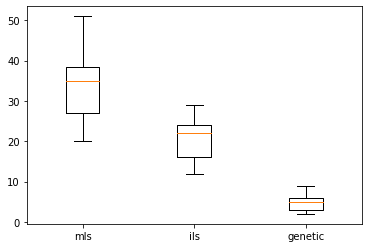

In [10]:
plt.boxplot([min_mls_cuts, min_ils_cuts, min_gen_cuts], labels=["mls", "ils", "genetic"])
plt.savefig("res/results/boxplotcomparison")
print("hi")

In [20]:
len(all_ils_cuts)

20

In [11]:
def getAvgsAndStd(all_cuts):
    avg = []

    for k in range(10000):
        sum = 0
        cnt = 0        
        for i in range(20):
            if len(all_cuts[i]) > k:
                sum += all_cuts[i][k]
                cnt += 1
        if cnt > 0:
            avg.append(sum/cnt)

    std = []
    for k in range(10000):
        std_sum = 0
        cnt = 0        
        for i in range(20):
            if len(all_cuts[i]) > k:
                
                std_sum += (avg[k] - all_cuts[i][k]) ** 2
                
                cnt += 1
        if cnt > 0:
            std.append(math.sqrt(std_sum/cnt))
    return avg, std
    

In [13]:
ils_avg, ils_std = getAvgsAndStd(all_ils_cuts)
mls_avg, mls_std = getAvgsAndStd(all_mls_cuts)
gen_avg, gen_std = getAvgsAndStd(all_cuts_gen)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


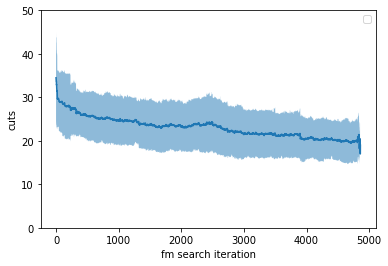

In [14]:

fig, ax = plt.subplots()
ax.fill_between(range(len(ils_avg)), np.array(ils_avg) + np.array(ils_std), np.array(ils_avg) - np.array(ils_std), alpha=.5, linewidth=0)
plt.plot(ils_avg)
plt.ylabel('cuts')
plt.legend()
plt.xlabel('fm search iteration')
plt.ylim(0, 50)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


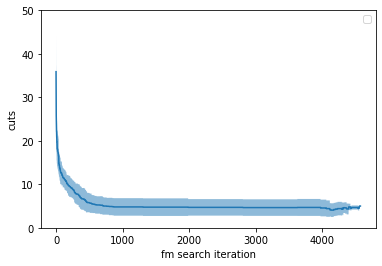

In [15]:

fig, ax = plt.subplots()
ax.fill_between(range(len(gen_avg)), np.array(gen_avg) + np.array(gen_std), np.array(gen_avg) - np.array(gen_std), alpha=.5, linewidth=0)
plt.plot(gen_avg)
plt.ylabel('cuts')
plt.legend()
plt.xlabel('fm search iteration')
plt.ylim(0, 50)
plt.show()


In [19]:
len(ils_avg)

4861

In [17]:

wilcoxon(gen_avg, ils_avg)

ValueError: The samples x and y must have the same length.